In [1]:
## load libraries
import sys
from numpy import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
%matplotlib inline
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing
from sklearn import neighbors, tree, naive_bayes
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier

C:\Users\gtara\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv("C:/Users/gtara/Desktop/loan_final.csv", low_memory=False)

In [3]:
# 5% of the data without replacement
data = data.sample(frac=0.05, replace=False, random_state=123)  

In [4]:
data.shape

(44369, 30)

In [5]:
data.head(n=5)

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
70467,8556040,2013,01/11/2013,1012016,10.00,MORTGAGE,3,Low,96000,1,...,0,9.67,B,2,22.75,10852.030000,9003.16,0.0,417.47,munster
165635,3355435,2013,01/02/2013,1062015,6.00,MORTGAGE,3,Low,58000,1,...,0,13.11,B,2,17.46,9627.426447,8000.00,0.0,269.98,cannught
496523,66611115,2015,01/12/2015,1012016,6.05,OWN,2,Low,52000,1,...,0,10.64,B,2,25.04,313.870000,237.02,0.0,325.69,munster
182496,1685370,2012,01/12/2012,1012013,10.00,OWN,2,Low,90000,1,...,0,15.80,C,3,18.16,16211.070000,16000.00,0.0,560.94,Northern-Irl
554977,63286796,2015,01/10/2015,1122015,10.00,RENT,1,Low,75000,1,...,0,7.89,A,1,8.47,616.950000,495.84,0.0,312.86,ulster


In [6]:
data.columns

Index(['id', 'year', 'issue_d', 'final_d', 'emp_length_int', 'home_ownership',
       'home_ownership_cat', 'income_category', 'annual_inc', 'income_cat',
       'loan_amount', 'term', 'term_cat', 'application_type',
       'application_type_cat', 'purpose', 'purpose_cat', 'interest_payments',
       'interest_payment_cat', 'loan_condition', 'loan_condition_cat',
       'interest_rate', 'grade', 'grade_cat', 'dti', 'total_pymnt',
       'total_rec_prncp', 'recoveries', 'installment', 'region'],
      dtype='object')

In [7]:
pd.unique(data['grade'].values.ravel())

array(['B', 'C', 'A', 'D', 'E', 'F', 'G'], dtype=object)

In [8]:
print("Amount of Classes: ", len(pd.unique(data['grade'].values.ravel())))

Amount of Classes:  7


In [9]:
for col in data.select_dtypes(include=['object']).columns:
    print ("Column {} has {} unique instances".format( col, len(data[col].unique())) )

Column issue_d has 102 unique instances
Column home_ownership has 5 unique instances
Column income_category has 3 unique instances
Column term has 2 unique instances
Column application_type has 2 unique instances
Column purpose has 14 unique instances
Column interest_payments has 2 unique instances
Column loan_condition has 2 unique instances
Column grade has 7 unique instances
Column region has 5 unique instances


In [10]:
len(pd.unique(data['id'].values.ravel())) == data.shape[0]

True

In [11]:
data = data.drop('id', 1)
data = data.drop('year', 1)
data = data.drop('issue_d', 1)
data = data.drop('final_d', 1)
data = data.drop('home_ownership_cat', 1)
data = data.drop('income_cat', 1)
data = data.drop('term_cat', 1)
data = data.drop('application_type_cat', 1)
data = data.drop('interest_payment_cat', 1)
data = data.drop('loan_condition_cat', 1)
data = data.drop('grade_cat', 1)

In [12]:
data.shape

(44369, 19)

In [13]:
for col in data.select_dtypes(include=['object']).columns:
    print ("Column {} has {} unique instances".format( col, len(data[col].unique())) )

Column home_ownership has 5 unique instances
Column income_category has 3 unique instances
Column term has 2 unique instances
Column application_type has 2 unique instances
Column purpose has 14 unique instances
Column interest_payments has 2 unique instances
Column loan_condition has 2 unique instances
Column grade has 7 unique instances
Column region has 5 unique instances


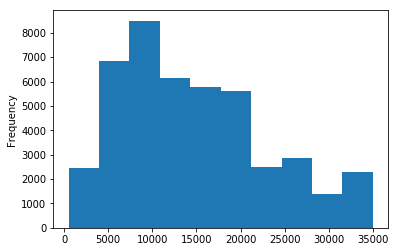

In [14]:
data['loan_amount'].plot(kind="hist", bins=10)

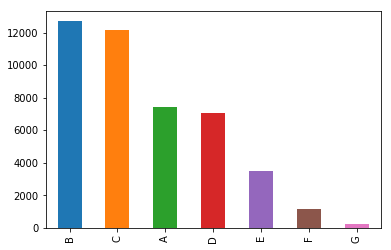

In [15]:
data['grade'].value_counts().plot(kind='bar')

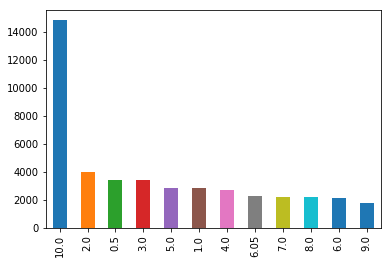

In [16]:
data['emp_length_int'].value_counts().plot(kind='bar')

In [17]:
data._get_numeric_data().columns

Index(['emp_length_int', 'annual_inc', 'loan_amount', 'purpose_cat',
       'interest_rate', 'dti', 'total_pymnt', 'total_rec_prncp', 'recoveries',
       'installment'],
      dtype='object')

In [18]:
"There are {} numeric columns in the data set".format(len(data._get_numeric_data().columns) ) 

'There are 10 numeric columns in the data set'

In [19]:
data.select_dtypes(include=['object']).columns

Index(['home_ownership', 'income_category', 'term', 'application_type',
       'purpose', 'interest_payments', 'loan_condition', 'grade', 'region'],
      dtype='object')

In [20]:
"There are {} Character columns in the data set (minus the target)".format(len(data.select_dtypes(include=['object']).columns) -1) 

'There are 8 Character columns in the data set (minus the target)'

In [23]:
X = data.drop("grade", axis=1, inplace = False)
y = data.grade

In [24]:
y.head()

70467     B
165635    B
496523    B
182496    C
554977    A
Name: grade, dtype: object

In [28]:
def model_matrix(df , columns):
    dummified_cols = pd.get_dummies(df[columns])
    df = df.drop(columns, axis = 1, inplace=False)
    df_new = df.join(dummified_cols)
    return df_new

X = model_matrix(X, ['home_ownership', 'income_category', 'term', 'application_type',
       'purpose', 'interest_payments', 'loan_condition', 'region'])

In [29]:
X.head()

,emp_length_int,annual_inc,loan_amount,purpose_cat,interest_rate,dti,total_pymnt,total_rec_prncp,recoveries,installment,...,purpose_wedding,interest_payments_High,interest_payments_Low,loan_condition_Bad Loan,loan_condition_Good Loan,region_Northern-Irl,region_cannught,region_leinster,region_munster,region_ulster
70467,10.00,96000,13000,7,9.67,22.75,10852.030000,9003.16,0.0,417.47,...,0,0,1,0,1,0,0,0,1,0
165635,6.00,58000,8000,6,13.11,17.46,9627.426447,8000.00,0.0,269.98,...,0,0,1,0,1,0,1,0,0,0
496523,6.05,52000,10000,6,10.64,25.04,313.870000,237.02,0.0,325.69,...,0,0,1,0,1,0,0,0,1,0
182496,10.00,90000,16000,6,15.80,18.16,16211.070000,16000.00,0.0,560.94,...,0,1,0,0,1,1,0,0,0,0
554977,10.00,75000,10000,6,7.89,8.47,616.950000,495.84,0.0,312.86,...,0,0,1,0,1,0,0,0,0,1


In [30]:
X.shape

(44369, 45)

In [31]:
# impute rows with NaN with a 0 for now
X2 = X.fillna(value = 0)
X2.head()

,emp_length_int,annual_inc,loan_amount,purpose_cat,interest_rate,dti,total_pymnt,total_rec_prncp,recoveries,installment,...,purpose_wedding,interest_payments_High,interest_payments_Low,loan_condition_Bad Loan,loan_condition_Good Loan,region_Northern-Irl,region_cannught,region_leinster,region_munster,region_ulster
70467,10.00,96000,13000,7,9.67,22.75,10852.030000,9003.16,0.0,417.47,...,0,0,1,0,1,0,0,0,1,0
165635,6.00,58000,8000,6,13.11,17.46,9627.426447,8000.00,0.0,269.98,...,0,0,1,0,1,0,1,0,0,0
496523,6.05,52000,10000,6,10.64,25.04,313.870000,237.02,0.0,325.69,...,0,0,1,0,1,0,0,0,1,0
182496,10.00,90000,16000,6,15.80,18.16,16211.070000,16000.00,0.0,560.94,...,0,1,0,0,1,1,0,0,0,0
554977,10.00,75000,10000,6,7.89,8.47,616.950000,495.84,0.0,312.86,...,0,0,1,0,1,0,0,0,0,1


In [32]:
from sklearn.preprocessing import MinMaxScaler

Scaler = MinMaxScaler()

X2[['emp_length_int', 'annual_inc', 'loan_amount', 'purpose_cat',
       'interest_rate', 'dti', 'total_pymnt', 'total_rec_prncp', 'recoveries',
       'installment']] = Scaler.fit_transform(X2[['emp_length_int', 'annual_inc', 'loan_amount', 'purpose_cat',
       'interest_rate', 'dti', 'total_pymnt', 'total_rec_prncp', 'recoveries',
       'installment']])

In [33]:
X2.head()

,emp_length_int,annual_inc,loan_amount,purpose_cat,interest_rate,dti,total_pymnt,total_rec_prncp,recoveries,installment,...,purpose_wedding,interest_payments_High,interest_payments_Low,loan_condition_Bad Loan,loan_condition_Good Loan,region_Northern-Irl,region_cannught,region_leinster,region_munster,region_ulster
70467,1.000000,0.015803,0.362319,0.461538,0.183777,0.033828,0.196791,0.257233,0.0,0.293954,...,0,0,1,0,1,0,0,0,1,0
165635,0.578947,0.009469,0.217391,0.384615,0.329109,0.025962,0.174584,0.228571,0.0,0.186030,...,0,0,1,0,1,0,1,0,0,0
496523,0.584211,0.008468,0.275362,0.384615,0.224757,0.037233,0.005692,0.006772,0.0,0.226795,...,0,0,1,0,1,0,0,0,1,0
182496,1.000000,0.014803,0.449275,0.384615,0.442755,0.027003,0.293972,0.457143,0.0,0.398936,...,0,1,0,0,1,1,0,0,0,0
554977,1.000000,0.012302,0.275362,0.384615,0.108576,0.012594,0.011188,0.014167,0.0,0.217407,...,0,0,1,0,1,0,0,0,0,1


In [34]:
x_train, x_test, y_train, y_test = train_test_split(X2, y, test_size=.3, random_state=123)

In [35]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(31058, 45)
(31058,)
(13311, 45)
(13311,)


In [36]:
# start out with the number of classes for neighbors
data_knn = KNeighborsClassifier(n_neighbors = 10, metric='euclidean')
data_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [37]:
data_knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [38]:
# R-square from training and test data
rsquared_train = data_knn.score(x_train, y_train)
rsquared_test = data_knn.score(x_test, y_test)
print ('Training data R-squared:')
print(rsquared_train)
print ('Test data R-squared:')
print(rsquared_test)

Training data R-squared:
0.6949578208513104
Test data R-squared:
0.6191871384569153


In [39]:
# confusion matrix
from sklearn.metrics import confusion_matrix

knn_confusion_matrix = confusion_matrix(y_true = y_test, y_pred = data_knn.predict(x_test))
print("The Confusion matrix:\n", knn_confusion_matrix)

The Confusion matrix:
 [[1608  582   11    0    0    0    0]
 [ 587 2932  264   13    0    0    0]
 [  63  815 2296  449   29    1    0]
 [   0    5  976 1033  121    4    0]
 [   0    1  214  539  318   19    1]
 [   0    0   41   92  165   55    0]
 [   0    1    4   20   35   17    0]]


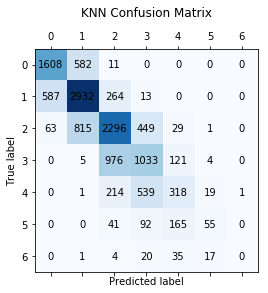

In [40]:
# visualize the confusion matrix
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
plt.matshow(knn_confusion_matrix, cmap = plt.cm.Blues)
plt.title("KNN Confusion Matrix\n")
#plt.xticks([0,1], ['No', 'Yes'])
#plt.yticks([0,1], ['No', 'Yes'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
for y in range(knn_confusion_matrix.shape[0]):
    for x in range(knn_confusion_matrix.shape[1]):
        plt.text(x, y, '{}'.format(knn_confusion_matrix[y, x]),
                horizontalalignment = 'center',
                verticalalignment = 'center',)
plt.show()

In [41]:
#Generate the classification report
from sklearn.metrics import classification_report
knn_classify_report = classification_report(y_true = y_test, 
                                           y_pred = data_knn.predict(x_test))
print(knn_classify_report)

             precision    recall  f1-score   support

          A       0.71      0.73      0.72      2201
          B       0.68      0.77      0.72      3796
          C       0.60      0.63      0.62      3653
          D       0.48      0.48      0.48      2139
          E       0.48      0.29      0.36      1092
          F       0.57      0.16      0.24       353
          G       0.00      0.00      0.00        77

avg / total       0.61      0.62      0.61     13311

